In [4]:
import sys
sys.executable
!{sys.executable} -m pip install imbalanced-learn

You should consider upgrading via the '/run/media/imsanskar/My_files/Projects/DS/.env/bin/python3.9 -m pip install --upgrade pip' command.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import umap

In [15]:
df = pd.read_csv("./data/AviationData.csv", encoding='cp1252')
# Drop columns with little information
# df.drop(['Latitude', 'Longitude','Air.carrier', 'Airport.Name', 'Airport.Code', 'Schedule', 'FAR.Description'], axis='columns', inplace = True)
df.shape

/tmp/ipykernel_474454/3801632993.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/AviationData.csv", encoding='cp1252')


(88889, 31)

In [16]:
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [6]:
# categories = ['Location', 'Country','Make', 'Model',
#        'Amateur.Built', 'Number.of.Engines', 'Purpose.of.flight', 'Broad.phase.of.flight'] 

# correalation = []
# for category in categories:
#     correalation.append(df[category].astype('category').cat.codes.corr(df['total']))
#     df[category].value_counts(), df[category].astype('category').cat.codes.value_counts()

KeyError: 'total'

/tmp/ipykernel_474454/3262552838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)


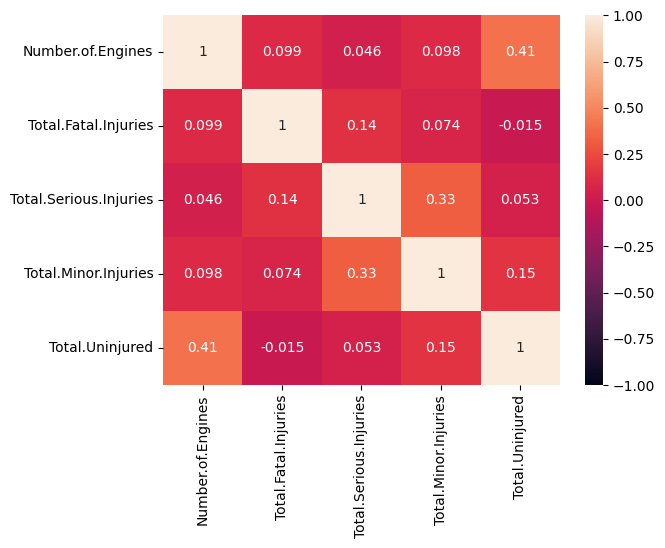

In [17]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)
plt.show()

/tmp/ipykernel_474454/1505517749.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_damage_info['Aircraft.damage'] = dataframe_damage_info['Aircraft.damage'].map(key_value)
/tmp/ipykernel_474454/1505517749.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe_damage_info.corr(), vmin=-1, vmax=1, annot = True)


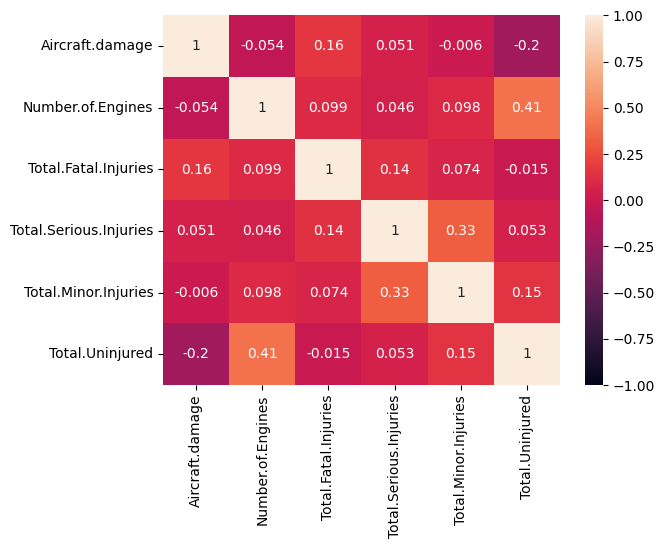

In [18]:
dataframe_damage_info = df[df['Aircraft.damage'] != 'Unknown' ] 
key_value = {
    'Minor': 1,
    'Substantial': 2,
    'Destroyed': 3,
}

dataframe_damage_info['Aircraft.damage'] = dataframe_damage_info['Aircraft.damage'].map(key_value)
# dataframe_damage_info['Type Engine'] = dataframe_damage_info['Engine.Type'].astype('category').cat.codes
sns.heatmap(dataframe_damage_info.corr(), vmin=-1, vmax=1, annot = True)
plt.show()

### Preprocessing

In [19]:
planedata_01 = df[['Location','Latitude','Longitude','Injury.Severity',
                         'Aircraft.damage', 'Aircraft.Category', 'Make', 
                         'Number.of.Engines', 'Engine.Type', 
                         'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                         'Weather.Condition','Broad.phase.of.flight',
                         'Total.Uninjured','Total.Minor.Injuries']]

planedata_01 =pd.DataFrame(planedata_01)
# In order not to remove those with NaN that could drastically reduce our dataset
# We put in a place holder of 'UNKNOWN' instead

planedata_01['Location'].fillna('UNKNOWN',inplace = True)
planedata_01['Latitude'].fillna('UNKNOWN',inplace = True)
planedata_01['Longitude'].fillna('UNKNOWN',inplace = True)
planedata_01['Injury.Severity'].fillna('UNKNOWN',inplace = True)

planedata_01['Aircraft.damage'].fillna('UNKNOWN',inplace=True)
planedata_01['Aircraft.damage'].replace({'Unknown':'UNKNOWN'},inplace=True)
planedata_01 =planedata_01[planedata_01['Aircraft.damage'].str.contains("UNKNOWN")==False]

planedata_01['Aircraft.Category'].fillna('UNKNOWN',inplace=True)
planedata_01['Aircraft.Category'].replace({'UNKNOWN':'Airplane'},inplace=True)
planedata_01 =planedata_01[planedata_01['Aircraft.Category'].str.contains("Airplane")==True]

planedata_01['Make'].fillna('UNKNOWN',inplace=True)
planedata_01['Number.of.Engines'].fillna('UNKNOWN',inplace=True)
#planedata_01 =planedata_01[planedata_01['Number.of.Engines'].str.contains("UNKNOWN")==False]
#planedata_01['Engine.Type'].fillna('UNKNOWN',inplace=True)
planedata_01 =planedata_01[planedata_01['Engine.Type'].str.contains("Unknown")==False]
#planedata_01 =planedata_01[planedata_01['Engine.Type'].str.contains("UNKNOWN")==False]
planedata_01['Total.Fatal.Injuries'].fillna(0,inplace=True)
planedata_01['Total.Minor.Injuries'].fillna(0,inplace=True)
planedata_01['Total.Uninjured'].fillna(0,inplace=True)
planedata_01['Total.Serious.Injuries'].fillna(0,inplace=True)
planedata_01['Broad.phase.of.flight'].fillna('UNKNOWN',inplace = True)
planedata_01 =planedata_01[planedata_01['Broad.phase.of.flight'].str.contains("Unknown")==False]
planedata_01 =planedata_01[planedata_01['Broad.phase.of.flight'].str.contains("UNKNOWN")==False]
planedata_01['Weather.Condition'].fillna('UNKNOWN',inplace = True)
planedata_01['Weather.Condition'].replace({'Unk':'UNKNOWN'},inplace=True)
planedata_01['Weather.Condition'].replace({'UNK':'UNKNOWN'},inplace=True)
planedata_01 =planedata_01[planedata_01['Weather.Condition'].str.contains("UNKNOWN")==False]
#planedata_01['Engine.Type'].fillna('UNKNOWN',inplace=True)


df = planedata_01
df.head()

,Location,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Total.Uninjured,Total.Minor.Injuries
2,"Saltville, VA",36.922223,-81.878056,Fatal(3),Destroyed,Airplane,Cessna,1.0,Reciprocating,3.0,0.0,IMC,Cruise,0.0,0.0
3,"EUREKA, CA",UNKNOWN,UNKNOWN,Fatal(2),Destroyed,Airplane,Rockwell,1.0,Reciprocating,2.0,0.0,IMC,Cruise,0.0,0.0
5,"BOSTON, MA",42.445277,-70.758333,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,2.0,Turbo Fan,0.0,0.0,VMC,Climb,44.0,1.0
7,"PULLMAN, WA",UNKNOWN,UNKNOWN,Non-Fatal,Substantial,Airplane,Cessna,1.0,Reciprocating,0.0,0.0,VMC,Takeoff,2.0,0.0
8,"EAST HANOVER, NJ",UNKNOWN,UNKNOWN,Non-Fatal,Substantial,Airplane,Cessna,2.0,Reciprocating,0.0,0.0,IMC,Landing,2.0,0.0


### Dimensionality Reduction

In [20]:
dataframe_damage_info = df[df['Aircraft.damage'] != 'Unknown' ] 
key_value = {
    'Minor': 0,
    'Substantial': 1,
    'Destroyed': 2,
}

dataframe_damage_info['Aircraft.damage'] = dataframe_damage_info['Aircraft.damage'].map(key_value)

dataframe_damage_info = dataframe_damage_info.dropna()
X_dataset = dataframe_damage_info[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
Y_dataset = dataframe_damage_info['Aircraft.damage']

Y_dataset

2        2
3        2
5        1
7        1
8        1
        ..
63904    1
63905    1
63909    1
63910    1
63911    1
Name: Aircraft.damage, Length: 57114, dtype: int64

In [4]:
pca = PCA(n_components = 2)
pca.fit(X_dataset)
scaled_X_data = StandardScaler().fit_transform(X_dataset)
X_pca = pca.fit_transform(scaled_X_data)

fig = plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.scatter(X_pca[Y_dataset==0, 0], X_pca[Y_dataset==0, 1], color='blue',label='0')
ax.scatter(X_pca[Y_dataset==1, 0], X_pca[Y_dataset==1, 1], color='green',label='1')
ax.scatter(X_pca[Y_dataset==2, 0], X_pca[Y_dataset==2, 1], color='red',label='2')

plt.show()

NameError: name 'X_dataset' is not defined

In [92]:
Y_dataset.value_counts()

1    41736
2    13805
0     1573
Name: Aircraft.damage, dtype: int64

### Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

Micro F1 score: 86.2470454346494
Macro F1 score: 67.89275184520855


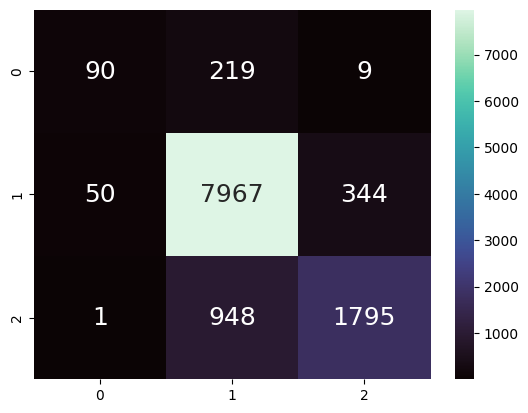

In [143]:
X_train, X_test, y_train, y_test  = train_test_split(X_dataset, Y_dataset, test_size = 0.2)
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
y_test_pred = dectree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="mako")
print(f"Micro F1 score: {f1_score(y_test, y_test_pred, average='micro') * 100}")
print(f"Macro F1 score: {f1_score(y_test, y_test_pred, average='macro') * 100}")
plt.show()

Micro F1 score: 85.94940033266218
Macro F1 score: 68.91483539150653


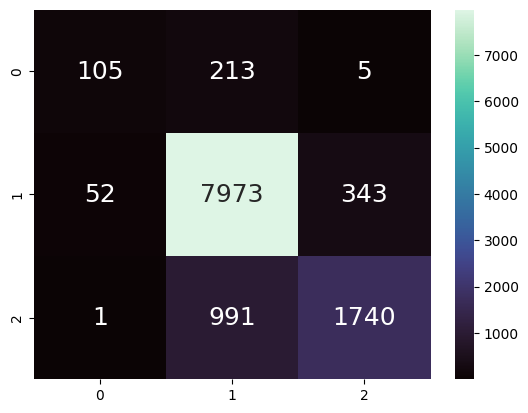

In [144]:
X_train, X_test, y_train, y_test  = train_test_split(X_pca, Y_dataset, test_size = 0.2)
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
y_test_pred = dectree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="mako")

print(f"Micro F1 score: {f1_score(y_test, y_test_pred, average='micro') * 100}")
print(f"Macro F1 score: {f1_score(y_test, y_test_pred, average='macro') * 100}")
plt.show()

## SMOTE (Synthetic Minority Oversampling Technique)


In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(X_dataset, Y_dataset, test_size = 0.2)
Y_dataset.value_counts()

1    41736
2    13805
0     1573
Name: Aircraft.damage, dtype: int64

In [40]:
from collections import Counter
categories_count = Counter(y_train)
dict(sorted(categories_count.items(), key=lambda item: item[1]))

{0: 1258, 2: 11038, 1: 33395}

In [80]:
u_strategy = {}
o_strategy = {}
for category in categories_count:
    if categories_count[category] > 30000:
        u_strategy[category] = 30000
    elif categories_count[category] > 10000:
        u_strategy[category] = 10000
    else:
        o_strategy[category] = 5000
print(u_strategy, o_strategy)
     


{1: 30000, 2: 10000} {0: 5000}


In [81]:
#The nearest neighbors used to define the neighborhood of samples to use to generate the synthetic samples. You can pass:
k = 8
over = SMOTE(sampling_strategy=o_strategy, k_neighbors=k)
under = RandomUnderSampler(sampling_strategy=u_strategy)

model = DecisionTreeClassifier(max_depth = 6)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('over', SMOTE(k_neighbors=8, sampling_strategy={0: 5000})),
                ('under',
                 RandomUnderSampler(sampling_strategy={1: 30000, 2: 10000})),
                ('model', DecisionTreeClassifier(max_depth=6))])

Micro F1 score: 85.704280836908
Macro F1 score: 69.50081042230005


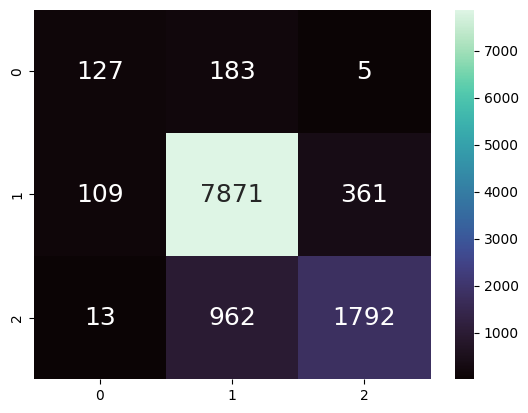

In [83]:
y_test_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="mako")
print(f"Micro F1 score: {f1_score(y_test, y_test_pred, average='micro') * 100}")
print(f"Macro F1 score: {f1_score(y_test, y_test_pred, average='macro') * 100}")
plt.show()